# Notebook d'exploration

In [1]:
# Import des librairies utiles
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Phase de nettoyage

In [2]:
# Import de la base titleBasics
titleBasics = pd.read_csv("/home/skikk/Documents/Formation data/Projet 2/BDD/title.basics.tsv.gz", sep = "\t")

/tmp/ipykernel_32450/2600053890.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titleBasics = pd.read_csv("/home/skikk/Documents/Formation data/Projet 2/BDD/title.basics.tsv.gz", sep = "\t")


### Clean de la base titleBasics

In [3]:
# supprimer la colonne endYear, et filtrer pour le type movie, avec un runtimes connu et un genre connu
titleBasics = titleBasics.loc[(titleBasics["titleType"] == "movie") & (titleBasics["runtimeMinutes"] != "\\N") & (titleBasics["isAdult"] == 0) & (titleBasics["genres"] != "\\N")]
titleBasics = titleBasics.drop("endYear", axis=1)

In [4]:
# Suppresion des lignes nulles dans startYear et modification du type de cette colonne
titleBasics = titleBasics.loc[titleBasics["startYear"] != "\\N"]

In [5]:
titleBasics["startYear"] = pd.to_datetime(titleBasics["startYear"], format="%Y").dt.year

In [6]:
# Filtrer pour les films diffusés depuis 2010 jusqu'en 2023. Pour ça, d'abord transformer en date
titleBasicsClean = titleBasics.loc[(titleBasics["startYear"] >= 2000) & (titleBasics["startYear"] < 2024)]

In [7]:
# Spliter le colonne genres dans un nouveau dataframe
genres = titleBasicsClean["genres"].str.split(",", expand=True)
genres.columns = ["Genre"+str(i+1) for i in range(len(genres.columns))]
genres

,Genre1,Genre2,Genre3
13079,Documentary,None,None
27745,Musical,None,None
34798,Comedy,Fantasy,Romance
61108,Drama,None,None
67660,Drama,None,None
...,...,...,...
10419163,Drama,None,None
10419204,Documentary,None,None
10419231,Documentary,None,None
10419253,Drama,None,None


In [8]:
# Concaténation du dataframe genres et titleBasicsClean
titleBasicsClean = pd.concat([titleBasicsClean, genres], axis=1)

In [9]:
titleBasicsClean = titleBasicsClean.reset_index(drop=True)

In [10]:
# Modification du type de la colonne runtimeMinutes
titleBasicsClean["runtimeMinutes"] = titleBasicsClean["runtimeMinutes"].astype(int)

In [11]:
titleBasicsClean.to_csv("titleBasicsClean.csv")

In [12]:
titleBasicsClean

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,Genre1,Genre2,Genre3
0,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,94,Documentary,Documentary,None,None
1,tt0028248,movie,Shipmates o' Mine,Shipmates o' Mine,0,2022,87,Musical,Musical,None,None
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance",Comedy,Fantasy,Romance
3,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,70,Drama,Drama,None,None
4,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,122,Drama,Drama,None,None
...,...,...,...,...,...,...,...,...,...,...,...
235842,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,123,Drama,Drama,None,None
235843,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,57,Documentary,Documentary,None,None
235844,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,100,Documentary,Documentary,None,None
235845,tt9916730,movie,6 Gunn,6 Gunn,0,2017,116,Drama,Drama,None,None


### Clean de la base titleRating

In [13]:
titleRatings = pd.read_csv("/home/skikk/Documents/Formation data/Projet 2/BDD/title.ratings.tsv.gz", sep = "\t")

In [14]:
# Vérification des valeurs nulles
titleRatings.loc[titleRatings["averageRating"] == "\\N"]

,tconst,averageRating,numVotes


In [15]:
titleRatings.loc[titleRatings["numVotes"] == "\\N"]

,tconst,averageRating,numVotes


Ici, pas de valeurs nulles. La table est exploitable en létat. Nous pouvons faire un merge entre la table titleBasicsClean et la table titleRatings

### Merge entre titleBasicsClean et titleRatings

In [16]:
movieDatas = titleBasicsClean.merge(titleRatings, how="inner", on="tconst")

In [17]:
movieDatas

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,Genre1,Genre2,Genre3,averageRating,numVotes
0,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,94,Documentary,Documentary,None,None,6.8,62
1,tt0028248,movie,Shipmates o' Mine,Shipmates o' Mine,0,2022,87,Musical,Musical,None,None,4.2,42
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance",Comedy,Fantasy,Romance,6.4,88199
3,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,70,Drama,Drama,None,None,6.4,183
4,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,122,Drama,Drama,None,None,6.7,7906
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154663,tt9916190,movie,Safeguard,Safeguard,0,2020,95,"Action,Adventure,Thriller",Action,Adventure,Thriller,3.7,248
154664,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,84,Thriller,Thriller,None,None,5.8,1456
154665,tt9916362,movie,Coven,Akelarre,0,2020,92,"Drama,History",Drama,History,None,6.4,5649
154666,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,123,Drama,Drama,None,None,8.6,7


### Clean de la base titleAkas

In [18]:
# Import de la base
titleAkas = pd.read_csv("/home/skikk/Documents/Formation data/Projet 2/BDD/title.akas.tsv.gz", sep = "\t")

/tmp/ipykernel_32450/2865612490.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  titleAkas = pd.read_csv("/home/skikk/Documents/Formation data/Projet 2/BDD/title.akas.tsv.gz", sep = "\t")


In [19]:
# Filtrer les films diffusés en France
titleAkasFR = titleAkas.loc[titleAkas["region"] == "FR"]
titleAkasFR

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
9,tt0000002,2,Le clown et ses chiens,FR,\N,imdbDisplay,\N,0
23,tt0000003,8,Pauvre Pierrot,FR,\N,imdbDisplay,\N,0
26,tt0000004,2,Un bon bock,FR,\N,imdbDisplay,\N,0
84,tt0000010,17,La sortie de l'usine Lumière,FR,\N,alternative,\N,0
86,tt0000010,19,La sortie des usines Lumière,FR,\N,alternative,\N,0
...,...,...,...,...,...,...,...,...
38219589,tt9916844,4,Épisode #3.15,FR,fr,\N,\N,0
38219593,tt9916846,1,Épisode #3.18,FR,fr,\N,\N,0
38219600,tt9916848,1,Épisode #3.17,FR,fr,\N,\N,0
38219609,tt9916850,3,Épisode #3.19,FR,fr,\N,\N,0


In [20]:
titleAkasFR["types"].value_counts()

types
\N             4422947
imdbDisplay     154050
alternative       5878
working           2155
tv                1795
dvd               1526
video             1502
festival           934
Name: count, dtype: int64

In [21]:
titleAkasFR["attributes"].value_counts()

attributes
\N                              4584162
alternative spelling                708
dubbed version                      631
complete title                      571
DVD box title                       504
                                 ...   
Pay-TV title                          1
literal French title                  1
videogame episode                     1
racier versionreissue title          1
first episode title                   1
Name: count, Length: 98, dtype: int64

In [22]:
titleAkasFR["isOriginalTitle"].value_counts()

isOriginalTitle
0     2893360
0     1697395
\N         32
Name: count, dtype: int64

In [23]:
titleAkasFR["language"].value_counts()

language
fr     4350336
\N      240380
qal         47
en          23
br           1
Name: count, dtype: int64

In [24]:
# Suppression des colonnes attributes et types. Nous ne voyons pas l'utilité pour l'exploration
titleAkasClean = titleAkasFR.drop(["attributes", "types"], axis=1)

In [25]:
# Renommer titleId en tconst pour coller aux autres tables
titleAkasClean = titleAkasClean.rename(columns={"titleId" : "tconst"})

In [26]:
titleAkasClean

,tconst,ordering,title,region,language,isOriginalTitle
9,tt0000002,2,Le clown et ses chiens,FR,\N,0
23,tt0000003,8,Pauvre Pierrot,FR,\N,0
26,tt0000004,2,Un bon bock,FR,\N,0
84,tt0000010,17,La sortie de l'usine Lumière,FR,\N,0
86,tt0000010,19,La sortie des usines Lumière,FR,\N,0
...,...,...,...,...,...,...
38219589,tt9916844,4,Épisode #3.15,FR,fr,0
38219593,tt9916846,1,Épisode #3.18,FR,fr,0
38219600,tt9916848,1,Épisode #3.17,FR,fr,0
38219609,tt9916850,3,Épisode #3.19,FR,fr,0


On peut constater qu'il y a des doublons de tconst notamment pour cet id = tt0000010. Il serait intéressant de supprimer les doublons

In [27]:
# Suppression des doublons tconst
titleAkasClean = titleAkasClean.drop_duplicates(subset=["tconst"])

In [28]:
# reset index
titleAkasClean = titleAkasClean.reset_index(drop=True)

In [29]:
titleAkasClean

,tconst,ordering,title,region,language,isOriginalTitle
0,tt0000002,2,Le clown et ses chiens,FR,\N,0
1,tt0000003,8,Pauvre Pierrot,FR,\N,0
2,tt0000004,2,Un bon bock,FR,\N,0
3,tt0000010,17,La sortie de l'usine Lumière,FR,\N,0
4,tt0000012,18,L'arrivée d'un train à La Ciotat,FR,\N,0
...,...,...,...,...,...,...
4575852,tt9916844,4,Épisode #3.15,FR,fr,0
4575853,tt9916846,1,Épisode #3.18,FR,fr,0
4575854,tt9916848,1,Épisode #3.17,FR,fr,0
4575855,tt9916850,3,Épisode #3.19,FR,fr,0


In [30]:
# Export de la table titleAkasFR
titleAkasClean.to_csv("titleAkasClean.csv")

### Clean de la base titlePrincipals

In [31]:
# Import de la base
titlePrincipals = pd.read_csv("/home/skikk/Documents/Formation data/Projet 2/BDD/title.principals.tsv.gz", sep = "\t")

In [32]:
# Filtre pour n'avoir que les acteurs, actrices et directeurs
titlePrincipalsClean = titlePrincipals.loc[(titlePrincipals["category"].str.contains("actor")) | (titlePrincipals["category"].str.contains("actress")) | (titlePrincipals["category"].str.contains("director"))]

In [33]:
titlePrincipalsClean["job"].value_counts()

job
\N                                      29977783
co-director                               108160
series director                            70006
creative director                          49457
supervising director                       22687
                                          ...   
segment director: Scene 57, Scene 62           1
studio director: Loomi Animation               1
director: Weatherford int.                     1
east coast director                            1
director: for Theatre Roundabout               1
Name: count, Length: 2182, dtype: int64

In [34]:
# Suppression de la colonne job et ordering, car beaucoup de valeur nulles et pas utile pour l'exploration
titlePrincipalsClean = titlePrincipalsClean.drop(["job", "ordering"], axis=1)

In [35]:
titlePrincipalsClean

,tconst,nconst,category,characters
1,tt0000001,nm0005690,director,\N
3,tt0000002,nm0721526,director,\N
5,tt0000003,nm0721526,director,\N
9,tt0000004,nm0721526,director,\N
11,tt0000005,nm0443482,actor,"[""Blacksmith""]"
...,...,...,...,...
59706783,tt9916880,nm1483166,actor,"[""Rude Ralph"",""Mischievous Mike"",""Jolly Josh""]"
59706784,tt9916880,nm0254176,actress,"[""Moody Margaret""]"
59706785,tt9916880,nm0286175,actor,"[""Dad"",""Aerobic Al"",""Nasty Nicola""]"
59706786,tt9916880,nm0584014,director,\N


In [36]:
# Export de la table cleanées
titlePrincipalsClean.to_csv("titlePrincipalsClean.csv")

### Clean de titleCrew

In [37]:
# Import de la base
titleCrew = pd.read_csv("/home/skikk/Documents/Formation data/Projet 2/BDD/title.crew.tsv.gz", sep = "\t")

In [38]:
titleCrew["writers"].value_counts()

writers
\N                                5024369
nm6352729                           14184
nm0596393                           12247
nm0934807                           10992
nm0914844                           10502
                                   ...   
nm2437080,nm0678963                     1
nm0523431,nm0923112,nm0678963           1
nm1753600,nm11237548,nm2858128          1
nm12073752                              1
nm6951431                               1
Name: count, Length: 1310908, dtype: int64

Ici, beaucoup de valeurs nulles sur la colonnes writers. Nous n'allons pas la conserver, d'autant plus que nous voulons nous focaliser sur les directeurs de films dans nos KPI's

In [39]:
titleCrewClean = titleCrew.drop("writers", axis=1)

In [40]:
titleCrewClean["directors"].value_counts()

directors
\N                       4433420
nm1203430                  11415
nm1409127                  10353
nm13220986                  8024
nm5236281,nm5239804         6616
                          ...   
nm10610967                     1
nm3754347,nm2590892            1
nm2627753                      1
nm12310907,nm12231313          1
nm10538645                     1
Name: count, Length: 916619, dtype: int64

Une nouvelle fois, beaucoup de lignes n'ont pas l'id du directeurs. Nous allons donc supprimer ces lignes

In [41]:
titleCrewClean = titleCrewClean.loc[titleCrewClean["directors"] != "\\N"]

In [42]:
titleCrewClean["directors"].value_counts()

directors
nm1203430              11415
nm1409127              10353
nm13220986              8024
nm5236281,nm5239804     6616
nm0022750               6496
                       ...  
nm4209218                  1
nm0402111                  1
nm4208496                  1
nm10963858                 1
nm10538645                 1
Name: count, Length: 916618, dtype: int64

Nous pouvons voir qu'il y a plusieurs directeurs sur certains films. Voyons tout de même si nous pouvons faire un merge avec la table nameBasics

### Merge de moviedatas et titleAkasClean

In [43]:
movieFrance = movieDatas.merge(titleAkasClean, how='inner', on="tconst")

In [44]:
movieFrance

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,Genre1,Genre2,Genre3,averageRating,numVotes,ordering,title,region,language,isOriginalTitle
0,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,94,Documentary,Documentary,None,None,6.8,62,2,Histoire de la guerre civile,FR,\N,0
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance",Comedy,Fantasy,Romance,6.4,88199,11,Kate et Léopold,FR,\N,0
2,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,70,Drama,Drama,None,None,6.4,183,7,El Tango del Viudo y Su Espejo Deformante,FR,\N,0
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,122,Drama,Drama,None,None,6.7,7906,15,De l'autre côté du vent,FR,\N,0
4,tt0082328,movie,Embodiment of Evil,Encarnação do Demônio,0,2008,94,Horror,Horror,None,None,5.9,1761,6,L'incarnation du démon,FR,\N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29945,tt9911196,movie,The Marriage Escape,De beentjes van Sint-Hildegard,0,2020,103,"Comedy,Drama",Comedy,Drama,None,7.5,3207,8,De Beentjes van Sint-Hildegard,FR,\N,0
29946,tt9913084,movie,Diabolik sono io,Diabolik sono io,0,2019,75,Documentary,Documentary,None,None,6.7,51,2,Diabolik sono io,FR,\N,0
29947,tt9913936,movie,Paradise,Paradise,0,2019,135,"Crime,Drama",Crime,Drama,None,7.4,62,6,Le paradis de Diego,FR,\N,0
29948,tt9915790,movie,Bobbyr Bondhura,Bobbyr Bondhura,0,2019,106,Family,Family,None,None,7.2,40,3,Bobbyr Bondhura,FR,\N,0


In [45]:
# Export en csv de cette base
movieFrance.to_csv("movieFranceClean.csv")

### Merge entre la table nameBasics et titlePrincipalsClean

In [46]:
# Import de nameBasics
nameBasics = pd.read_csv("/home/skikk/Documents/Formation data/Projet 2/BDD/name.basics.tsv.gz", sep = "\t")

In [47]:
directors_and_actors = titlePrincipalsClean.merge(nameBasics, how="inner", on="nconst")

In [48]:
directors_and_actors

,tconst,nconst,category,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000001,nm0005690,director,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt1496763,tt0308254,tt1428455,tt0219560"
1,tt0000005,nm0005690,director,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt1496763,tt0308254,tt1428455,tt0219560"
2,tt0000006,nm0005690,director,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt1496763,tt0308254,tt1428455,tt0219560"
3,tt0000007,nm0005690,director,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt1496763,tt0308254,tt1428455,tt0219560"
4,tt0000008,nm0005690,director,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt1496763,tt0308254,tt1428455,tt0219560"
...,...,...,...,...,...,...,...,...,...
30369851,tt9916764,nm10538641,actor,"[""Waitress""]",Yvonne Akins,\N,\N,actor,tt9916764
30369852,tt9916856,nm10538650,actress,"[""Sandra""]",Anna Fitoussi,\N,\N,actress,tt9916856
30369853,tt9916856,nm10538646,actor,"[""Stephan""]",Andreas Demmel,\N,\N,actor,tt9916856
30369854,tt9916856,nm10538647,actress,"[""Kathi""]",Kathrin Knöpfle,\N,\N,actress,"tt9916856,tt5641586"


In [49]:
# Filtrer pour les films qui sont dans la base titleAkasClean
directors_and_actors_fr = directors_and_actors[directors_and_actors["tconst"].isin(movieFrance["tconst"])].reset_index(drop=True)

In [50]:
directors_and_actors_fr_rating = directors_and_actors_fr.merge(titleRatings, how="inner", on="tconst")

In [51]:
# Export de cette base
directors_and_actors_fr_rating.to_csv("directors_and_actors_fr_rating.csv")

## Exploration des directeurs les plus populaires

In [52]:
# Filtrer sur la base directors_and_actors uniquement les personnes avec le poste director et le stocker dans un nouveau dataframe
directors = directors_and_actors_fr_rating.loc[directors_and_actors_fr_rating["category"] == "director"]

In [53]:
# Filtrer les films avec plus de 10 000 votes
directors = directors.loc[directors["numVotes"] > 10000]

In [54]:
# Création d'un dataframe pour stocker uniquement le top10 des directeurs depuis 2000
top10dir = directors.pivot_table(values=["averageRating", "numVotes"], index="primaryName", aggfunc="mean").sort_values(by="numVotes", ascending=False).head(10)

In [55]:
# Reset index
top10dir = top10dir.reset_index(drop=False)

In [56]:
top10dir

,primaryName,averageRating,numVotes
0,Christopher Nolan,8.245455,1.413936e+06
1,Bob Peterson,8.300000,1.102971e+06
2,Peter Jackson,7.955556,9.360070e+05
3,James Cameron,7.750000,9.201430e+05
4,Lee Unkrich,8.250000,8.753445e+05
5,Loveleen Tandan,8.000000,8.694880e+05
6,Jan Pinkava,8.100000,8.012020e+05
7,Pete Docter,8.125000,7.986282e+05
8,Quentin Tarantino,7.970000,7.928192e+05
9,George Lucas,7.100000,7.890130e+05


In [57]:
# Création d'une visualisation du top 10 des acteurs
px.bar(top10dir, 
       x="primaryName", 
       y="numVotes",
       labels={
           "numVotes":"Nombre de votes",
           "primaryName":"Directeur"
       },
       title="Top 10 des directeurs plus populaires depuis 2000 (en se basant sur le nombre de votes)",
       template="seaborn")

In [58]:
# Création d'un dataframe pour afficher les 10 directeurs les mieux notés en moyenne
top10dirRating = directors[["averageRating", "numVotes"]].groupby(directors["primaryName"]).mean().sort_values(by="averageRating", ascending=False).head(10).reset_index()

In [59]:
# Visualisation du top 10 des directeurs les mieux notés depuis 2000
px.bar(top10dirRating, 
       x="primaryName", 
       y="averageRating",
       labels={
           "averageRating":"Note moyenne",
           "primaryName":"Directeur"
       },
       title="Top 10 des directeurs les mieux notés depuis 2000",
       template="seaborn")

In [60]:
# Sans appliquer de filtres sur le nombre de votes
directors_v2 = directors_and_actors_fr_rating.loc[directors_and_actors_fr_rating["category"] == "director"]

In [61]:
# Création d'un dataframe pour stocker uniquement le top10 des directeurs depuis 2000
top10dir_v2 = directors_v2.pivot_table(values=["averageRating", "numVotes"], index="primaryName", aggfunc="mean").sort_values(by="numVotes", ascending=False).head(10).reset_index()

In [62]:
top10dir_v2

,primaryName,averageRating,numVotes
0,Christopher Nolan,8.245455,1.413936e+06
1,Bob Peterson,8.300000,1.102971e+06
2,Lee Unkrich,8.250000,8.753445e+05
3,Loveleen Tandan,8.000000,8.694880e+05
4,Peter Jackson,8.060000,8.425477e+05
5,Jan Pinkava,8.100000,8.012020e+05
6,Pete Docter,8.125000,7.986282e+05
7,Quentin Tarantino,7.970000,7.928192e+05
8,George Lucas,7.100000,7.890130e+05
9,Ronnie Del Carmen,8.100000,7.661540e+05


In [63]:
# Création d'une visualisation du top 10 des acteurs
px.bar(top10dir_v2, 
       x="primaryName", 
       y="numVotes",
       labels={
           "numVotes":"Nombre de votes",
           "primaryName":"Directeur"
       },
       title="Top 10 des directeurs plus populaires depuis 2000 (en se basant sur le nombre de votes)",
       template="seaborn")

In [64]:
# Création d'un dataframe pour afficher les 10 directeurs les mieux notés en moyenne sans filtre de nombre de votes
top10dirRating_v2 = directors_v2[["averageRating", "numVotes"]].groupby(directors_v2["primaryName"]).mean().sort_values(by="averageRating", ascending=False).head(10).reset_index()

In [65]:
# Visualisation du top 10 des directeurs les mieux notés depuis 2000 sans filtre sur le nombre de votes
px.bar(top10dirRating_v2, 
       x="primaryName", 
       y="averageRating",
       labels={
           "averageRating":"Note moyenne",
           "primaryName":"Directeur"
       },
       title="Top 10 des directeurs les mieux notés depuis 2000",
       template="seaborn")

### Clean de la base TMDB

In [66]:
tmdb = pd.read_csv('/home/skikk/Documents/Formation data/Projet 2/BDD/tmdb_full.csv', sep=",")

/tmp/ipykernel_32450/1986276339.py:1: DtypeWarning:

Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.



In [67]:
# Filtrer les films qui sont dans la région FR en se basant sur la table titleAkas
tmdbFR = tmdb[tmdb["imdb_id"].isin(movieFrance["tconst"])]

In [68]:
# Export en csv
tmdbFR.to_csv("tmdbFR.csv")

## Exploration des genres

In [69]:
popularityGenre1 = movieFrance.pivot_table(values=["averageRating", "numVotes"], index=["Genre1"], aggfunc="mean").sort_values(by="numVotes", ascending=False).reset_index()
popularityGenre2 = movieFrance.pivot_table(values=["averageRating", "numVotes"], index=["Genre2"], aggfunc="mean").sort_values(by="numVotes", ascending=False).reset_index()
popularityGenre3 = movieFrance.pivot_table(values=["averageRating", "numVotes"], index=["Genre3"], aggfunc="mean").sort_values(by="numVotes", ascending=False).reset_index()

In [70]:
# Merge de ces dataframes
popularityGenre = popularityGenre1.merge(popularityGenre2, how="outer", left_on="Genre1", right_on="Genre2")

In [71]:
popularityGenre

,Genre1,averageRating_x,numVotes_x,Genre2,averageRating_y,numVotes_y
0,Action,5.662929,63777.791676,NaN,NaN,NaN
1,Adventure,5.988420,46080.050346,Adventure,5.771744,107562.164509
2,Mystery,5.491525,36903.076271,Mystery,5.735143,44005.760246
3,Biography,6.839116,30160.806803,Biography,6.811486,51723.479730
4,Crime,6.135550,28713.807955,Crime,6.003237,42989.688017
5,Horror,4.801554,22297.521836,Horror,5.214014,23650.038879
6,Comedy,5.884390,19053.072452,Comedy,5.846161,41109.113857
7,Sci-Fi,4.836765,15390.632353,Sci-Fi,4.990498,46642.162896
8,Fantasy,5.389706,13733.735294,Fantasy,5.758720,33118.771200
9,Drama,6.246942,12908.115991,Drama,6.278777,28068.768952


In [72]:
popularityGenreFinal = popularityGenre.merge(popularityGenre3, how="outer", left_on="Genre2", right_on="Genre3")

In [73]:
# Remplacer les valeurs nulles par 0
popularityGenreFinal = popularityGenreFinal.fillna(0)

In [74]:
# Calcul des résultats globaux par genre
popularityGenreFinal["totalNumVotes"] = (popularityGenreFinal["numVotes_x"] + popularityGenreFinal["numVotes_y"] + popularityGenreFinal["numVotes"]) / 3

In [75]:
popularityGenreFinal["totalAverageRating"] = (popularityGenreFinal["averageRating_x"] + popularityGenreFinal["averageRating_y"] + popularityGenreFinal["averageRating"]) / 3

In [76]:
popularityGenreFinal = popularityGenreFinal.fillna(0)

In [77]:
popularityGenreFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genre1              23 non-null     object 
 1   averageRating_x     23 non-null     float64
 2   numVotes_x          23 non-null     float64
 3   Genre2              23 non-null     object 
 4   averageRating_y     23 non-null     float64
 5   numVotes_y          23 non-null     float64
 6   Genre3              23 non-null     object 
 7   averageRating       23 non-null     float64
 8   numVotes            23 non-null     float64
 9   totalNumVotes       23 non-null     float64
 10  totalAverageRating  23 non-null     float64
dtypes: float64(8), object(3)
memory usage: 2.1+ KB


In [78]:
# Création d'une boucle pour vérifier si toutes les colonnes numériques sont remplie, sinon, appliquer des calculs différents pour obtenir une moyenne des nombres de votes et note pour chaque genre
for idx, row in popularityGenreFinal.iterrows():
   if row["averageRating_y"] == 0 and row["averageRating"] == 0:
       popularityGenreFinal.loc[idx, "totalNumVotes"] = row["numVotes_x"]
       popularityGenreFinal.loc[idx, "totalAverageRating"] = row["averageRating_x"]
   elif row["averageRating"] == 0 and row["averageRating_y"] > 0 and row["averageRating_x"] > 0:
       popularityGenreFinal.loc[idx, "totalNumVotes"] = (row["numVotes_x"] + row["numVotes_y"])/2
       popularityGenreFinal.loc[idx, "totalAverageRating"] = (row["averageRating_x"] + row["averageRating_y"])/2
   elif row["averageRating_x"] == 0 and row["averageRating_y"] > 0 and row["averageRating"] > 0:
       popularityGenreFinal.loc[idx, "totalNumVotes"] = (row["numVotes"] + row["numVotes_y"])/2
       popularityGenreFinal.loc[idx, "totalAverageRating"] = (row["averageRating"] + row["averageRating_y"])/2
   else:
       popularityGenreFinal.loc[idx, "totalAverageRating"] = (row["averageRating_x"] + row["averageRating_y"] + row["averageRating"]) / 3
       popularityGenreFinal.loc[idx, "totalNumVotes"] = (row["numVotes_x"] + row["numVotes_y"] + row["numVotes"]) / 3


In [79]:
popularityGenreFinal = popularityGenreFinal.sort_values(by="totalNumVotes", ascending=False)

In [80]:
popularityGenreFinal["Genre1"] = popularityGenreFinal["Genre1"].replace(to_replace=0, value="News")

In [81]:
popularityGenreFinal

,Genre1,averageRating_x,numVotes_x,Genre2,averageRating_y,numVotes_y,Genre3,averageRating,numVotes,totalNumVotes,totalAverageRating
2,Adventure,5.988420,46080.050346,Adventure,5.771744,107562.164509,0,0.000000,0.000000,76821.107427,5.880082
0,Action,5.662929,63777.791676,0,0.000000,0.000000,0,0.000000,0.000000,63777.791676,5.662929
8,Sci-Fi,4.836765,15390.632353,Sci-Fi,4.990498,46642.162896,Sci-Fi,5.563881,117029.180597,59687.325282,5.130381
4,Biography,6.839116,30160.806803,Biography,6.811486,51723.479730,Biography,6.505556,54492.722222,45459.002918,6.718719
7,Comedy,5.884390,19053.072452,Comedy,5.846161,41109.113857,Comedy,5.851613,76190.491935,45450.892748,5.860721
5,Crime,6.135550,28713.807955,Crime,6.003237,42989.688017,Crime,6.004675,55899.628571,42534.374848,6.047821
9,Fantasy,5.389706,13733.735294,Fantasy,5.758720,33118.771200,Fantasy,5.863592,74615.241100,40489.249198,5.670673
3,Mystery,5.491525,36903.076271,Mystery,5.735143,44005.760246,Mystery,5.862951,37349.465574,39419.434030,5.696540
11,Animation,6.376754,9031.046053,Animation,6.190282,51215.509404,Animation,6.630534,43961.835878,34736.130445,6.399190
10,Drama,6.246942,12908.115991,Drama,6.278777,28068.768952,Drama,6.318523,49331.521477,30102.802140,6.281414


In [82]:
# Drop des colonnes qui ne sont plus utiles
popularityGenreGlobalExtract = popularityGenreFinal.drop(["averageRating_x", "numVotes_x", "Genre2", "averageRating_y", "numVotes_y", "Genre3", "averageRating", "numVotes"], axis=1)

In [83]:
# Clarification de la base en modifiant les noms de colonne
popularityGenreGlobalExtract = popularityGenreGlobalExtract.rename(columns={"Genre1":"genre", "totalNumVotes":"nbVoteMoyenParFilm", "totalAverageRating":"noteMoyenneParFilm"})

In [84]:
# reset index
popularityGenreGlobalExtract = popularityGenreGlobalExtract.reset_index(drop=True)

In [85]:
# Export de cette base pour le dashboard
popularityGenreGlobalExtract.to_csv("populariteGenreGlobal.csv")

### Visualisations sur les genres en utilisant les colonnes genre 1 genre2 et genre 3

In [86]:
# Visualisations genre majeur

averageGenre1 = px.bar(popularityGenre1, x="Genre1", y="averageRating", 
                       title="Note moyenne des films par genre majeur",
                       labels={"averageRating" : "Note moyenne",
                               "Genre1" : "Genre majeur"}, template="seaborn")
numVotesGenre1 = px.bar(popularityGenre1, x="Genre1", y="numVotes",
                        title="Nombre de votes moyen des films par genre majeur",
                        labels={"numVotes" : "Nombre de votes",
                               "Genre1" : "Genre majeur"}, template="seaborn")

averageGenre1.show()
numVotesGenre1.show()

In [87]:
averageGenre2 = px.bar(popularityGenre2, x="Genre2", y="averageRating", 
                       title="Note moyenne des films par genre secondaire",
                       labels={"averageRating" : "Note moyenne",
                               "Genre2" : "Genre secondaire"}, template="seaborn")
numVotesGenre2 = px.bar(popularityGenre2, x="Genre2", y="numVotes",
                        title="Nombre de votes moyen des films par genre secondaire",
                        labels={"numVotes" : "Nombre de votes",
                               "Genre2" : "Genre secondaire"}, template="seaborn")

averageGenre2.show()
numVotesGenre2.show()

In [88]:
averageGenre3 = px.bar(popularityGenre3, x="Genre3", y="averageRating", 
                       title="Note moyenne des films par genre tertiaire",
                       labels={"averageRating" : "Note moyenne",
                               "Genre3" : "Genre secondaire"}, template="seaborn")
numVotesGenre3 = px.bar(popularityGenre3, x="Genre3", y="numVotes",
                        title="Nombre de votes moyen des films par genre tertaire",
                        labels={"numVotes" : "Nombre de votes",
                               "Genre3" : "Genre tertiaire"}, template="seaborn")

averageGenre3.show()
numVotesGenre3.show()

### Visualisations en utilisant la table popularityGenreFinal

In [89]:
averageGenreGlobal = px.bar(popularityGenreFinal, x="Genre1", y="totalAverageRating", 
                       title="Note moyenne des films par genre",
                       labels={"totalAverageRating" : "Note moyenne",
                               "Genre1" : "Genre"}, template="seaborn")
numVotesGenreGlobal = px.bar(popularityGenreFinal, x="Genre1", y="totalNumVotes",
                        title="Nombre de votes moyen des films par genre",
                        labels={"totalNumVotes" : "Nombre de votes",
                               "Genre1" : "Genre"}, template="seaborn")

averageGenreGlobal.show()
numVotesGenreGlobal.show()

<ins>**Interprétations**</ins>:

Nous pouvons constater que le top 5 des genres les plus populaires en France depuis 2010, en se basant sur le nombre de votes, est le suivant :

1. Adventure
2. Action
3. Science-fiction
4. Biography
5. Comedy

Il est intéressant de noter que parmis ce top 5, le genre avec la meilleure moyenne par film est le genre biographique. Il est intéressant de voir quels sont les tendances sur ce genre

Le flop 5 est le suivant :

1. News
2. Documentary
3. Musical
4. Sport
5. Family

### Tendances des popularités

In [90]:
# Pivot table des genres par date
popularityGenre1Date = movieFrance.pivot_table(values=["averageRating", "numVotes"], index=["startYear", "Genre1"], aggfunc="mean").sort_values(by="numVotes", ascending=False).reset_index()
popularityGenre2Date = movieFrance.pivot_table(values=["averageRating", "numVotes"], index=["startYear", "Genre2"], aggfunc="mean").sort_values(by="numVotes", ascending=False).reset_index()
popularityGenre3Date = movieFrance.pivot_table(values=["averageRating", "numVotes"], index=["startYear", "Genre3"], aggfunc="mean").sort_values(by="numVotes", ascending=False).reset_index()

In [91]:
genre1ByYear = movieFrance[["averageRating", "numVotes"]].groupby([movieFrance["startYear"], movieFrance["Genre1"]]).mean().reset_index()
genre2ByYear = movieFrance[["averageRating", "numVotes"]].groupby([movieFrance["startYear"], movieFrance["Genre2"]]).mean().reset_index()
genre3ByYear = movieFrance[["averageRating", "numVotes"]].groupby([movieFrance["startYear"], movieFrance["Genre3"]]).mean().reset_index()

In [92]:
genreByYear = genre1ByYear.merge(genre2ByYear, how="outer", left_on=["startYear", "Genre1"], right_on=["startYear", "Genre2"])
genreByYear = genreByYear.merge(genre3ByYear, how="outer", left_on=["startYear", "Genre2"], right_on=["startYear", "Genre3"])

In [93]:
# Remplacer les valeurs nulles par des 0
genreByYearClean = genreByYear.fillna(0)

In [94]:
genreByYearClean

,startYear,Genre1,averageRating_x,numVotes_x,Genre2,averageRating_y,numVotes_y,Genre3,averageRating,numVotes
0,2000,Action,5.568478,67688.608696,0,0.000000,0.000000,0,0.000000,0.000000
1,2000,Adventure,5.831429,67793.428571,Adventure,5.606250,124991.187500,0,0.000000,0.000000
2,2000,Animation,5.128571,2820.857143,Animation,6.500000,53121.000000,Animation,5.950000,13126.000000
3,2000,Biography,6.904167,31923.541667,Biography,5.500000,4845.000000,0,0.000000,0.000000
4,2000,Comedy,5.992576,21451.183406,Comedy,6.116667,39036.666667,Comedy,6.100000,81978.454545
...,...,...,...,...,...,...,...,...,...,...
513,2008,0,0.000000,0.000000,0,0.000000,0.000000,Western,5.700000,9133.000000
514,2010,0,0.000000,0.000000,0,0.000000,0.000000,News,7.550000,52.500000
515,2015,0,0.000000,0.000000,0,0.000000,0.000000,News,7.460000,2283.000000
516,2015,0,0.000000,0.000000,0,0.000000,0.000000,Western,6.614286,31316.000000


In [95]:
# Création d'une boucle pour vérifier si toutes les colonnes numériques sont remplie, sinon, appliquer des calculs différents pour obtenir une moyenne des nombres de votes et note pour chaque genre
for idx, row in genreByYearClean.iterrows():
   if row["averageRating_y"] == 0 and row["averageRating"] == 0:
       genreByYearClean.loc[idx, "totalNumVotes"] = row["numVotes_x"]
       genreByYearClean.loc[idx, "totalAverageRating"] = row["averageRating_x"]
   elif row["averageRating"] == 0 and row["averageRating_y"] > 0 and row["averageRating_x"] > 0:
       genreByYearClean.loc[idx, "totalNumVotes"] = (row["numVotes_x"] + row["numVotes_y"])/2
       genreByYearClean.loc[idx, "totalAverageRating"] = (row["averageRating_x"] + row["averageRating_y"])/2
   elif row["averageRating_x"] == 0 and row["averageRating_y"] > 0 and row["averageRating"] > 0:
       genreByYearClean.loc[idx, "totalNumVotes"] = (row["numVotes"] + row["numVotes_y"])/2
       genreByYearClean.loc[idx, "totalAverageRating"] = (row["averageRating"] + row["averageRating_y"])/2
   else:
       genreByYearClean.loc[idx, "totalAverageRating"] = (row["averageRating_x"] + row["averageRating_y"] + row["averageRating"]) / 3
       genreByYearClean.loc[idx, "totalNumVotes"] = (row["numVotes_x"] + row["numVotes_y"] + row["numVotes"]) / 3


In [96]:
# Remplacer les valeurs 0 dans Genre1 par la valeur dans genre2 ou genre3 si elles ne sont pas nulles
for idx, row in genreByYearClean.iterrows():
    if row["Genre1"] == 0:
        if row["Genre2"] == 0:
            genreByYearClean.loc[idx, "Genre1"] = row["Genre3"]
        else:
            genreByYearClean.loc[idx, "Genre1"] = row["Genre2"]

In [97]:
genreByYearClean

,startYear,Genre1,averageRating_x,numVotes_x,Genre2,averageRating_y,numVotes_y,Genre3,averageRating,numVotes,totalNumVotes,totalAverageRating
0,2000,Action,5.568478,67688.608696,0,0.000000,0.000000,0,0.000000,0.000000,67688.608696,5.568478
1,2000,Adventure,5.831429,67793.428571,Adventure,5.606250,124991.187500,0,0.000000,0.000000,96392.308036,5.718839
2,2000,Animation,5.128571,2820.857143,Animation,6.500000,53121.000000,Animation,5.950000,13126.000000,23022.619048,5.859524
3,2000,Biography,6.904167,31923.541667,Biography,5.500000,4845.000000,0,0.000000,0.000000,18384.270833,6.202083
4,2000,Comedy,5.992576,21451.183406,Comedy,6.116667,39036.666667,Comedy,6.100000,81978.454545,47488.768206,6.069748
...,...,...,...,...,...,...,...,...,...,...,...,...
513,2008,Western,0.000000,0.000000,0,0.000000,0.000000,Western,5.700000,9133.000000,3044.333333,1.900000
514,2010,News,0.000000,0.000000,0,0.000000,0.000000,News,7.550000,52.500000,17.500000,2.516667
515,2015,News,0.000000,0.000000,0,0.000000,0.000000,News,7.460000,2283.000000,761.000000,2.486667
516,2015,Western,0.000000,0.000000,0,0.000000,0.000000,Western,6.614286,31316.000000,10438.666667,2.204762


In [98]:
# Drop des colonnes dont on n'a plus besoin
genreParAnnee = genreByYearClean.drop(columns=["averageRating_x", "numVotes_x", "Genre2", "averageRating_y", "numVotes_y", "Genre3", "averageRating", "numVotes"], axis=1)

In [99]:
# Clarifier la table en renommant les colonnes
genreParAnnee = genreParAnnee.rename(columns={"startYear":"annee", "Genre1":"genre", "totalNumVotes":"nbVoteMoyenParFilm", "totalAverageRating":"noteMoyenneParFilm"})

In [100]:
# Export en CSV de cette table
genreParAnnee.to_csv("populariteGenreParAnnee.csv")

### Visualisation des tendances de popularité pour le genre biographique et tous les autres genres

In [101]:
biography = px.scatter(genreByYearClean.loc[genreByYearClean["Genre1"] == "Biography"], 
           x="startYear", 
           y="totalNumVotes", 
           trendline="ols",
           template="seaborn",
           labels={
               "startYear" : "Années",
               "totalNumVotes" : "Nombre de votes moyen par films"
           },
           title="Tendances de l'attractivité des films biographiques depuis 2010, en France")

biography.show()

allGenres = px.scatter(genreByYearClean, 
           x="startYear", 
           y="totalNumVotes",
           color="Genre1", 
           trendline="ols",
           template="seaborn",
           labels={
               "startYear" : "Années",
               "totalNumVotes" : "Nombre de votes moyen par films",
               "Genre1" : "Genres"
           },
           title="Tendances de l'attractivité des films biographiques depuis 2010, en France")

allGenres.show()

### Exploration des genres qui génèrent le plus de revenus

In [102]:
# Merge de la table movie france et tmdb
movieFranceTMDB = movieFrance.merge(tmdb, how="inner", left_on="tconst", right_on="imdb_id")

In [103]:
# Pivot tables pour regrouper les genres
genre1Revenue = movieFranceTMDB["revenue"].groupby([movieFranceTMDB["startYear"], movieFranceTMDB["Genre1"]]).sum().reset_index()
genre2Revenue = movieFranceTMDB["revenue"].groupby([movieFranceTMDB["startYear"], movieFranceTMDB["Genre2"]]).sum().reset_index()
genre3Revenue = movieFranceTMDB["revenue"].groupby([movieFranceTMDB["startYear"], movieFranceTMDB["Genre3"]]).sum().reset_index()

In [104]:
# Merges pour avoir une table finale exploitable
genreRevenueByYear = genre1Revenue.merge(genre2Revenue, how="outer", left_on=["startYear", "Genre1"], right_on=["startYear", "Genre2"])

In [105]:
genreRevenueByYear = genreRevenueByYear.merge(genre3Revenue, how="outer", left_on=["startYear", "Genre2"], right_on=["startYear", "Genre3"])

In [106]:
# Remplacer NaN par 0
genreRevenueByYear = genreRevenueByYear.fillna(0)

In [107]:
# Création d'une boucle pour vérifier si toutes les colonnes numériques sont remplie, sinon, appliquer des calculs différents pour obtenir un revenu global par genre
for idx, row in genreRevenueByYear.iterrows():
   if row["Genre2"] == 0 and row["Genre3"] == 0:
       genreRevenueByYear.loc[idx, "totalRevenue"] = row["revenue_x"]
   elif row["Genre3"] == 0 and row["Genre2"] != 0 and row["Genre1"] != 0:
       genreRevenueByYear.loc[idx, "totalRevenue"] = (row["revenue_x"] + row["revenue_y"])
   elif row["Genre1"] == 0 and row["Genre2"] != 0 and row["Genre3"] != 0:
       genreRevenueByYear.loc[idx, "totalRevenue"] = (row["revenue"] + row["revenue_y"])
   else:
       genreRevenueByYear.loc[idx, "totalRevenue"] = (row["revenue_x"] + row["revenue_y"] + row["revenue"])

In [108]:
# Remplacer les valeurs 0 dans Genre1 par la valeur dans genre2 ou genre3 si elles ne sont pas nulles
for idx, row in genreRevenueByYear.iterrows():
    if row["Genre1"] == 0:
        if row["Genre2"] == 0:
            genreRevenueByYear.loc[idx, "Genre1"] = row["Genre3"]
        else:
            genreRevenueByYear.loc[idx, "Genre1"] = row["Genre2"]

In [109]:
genreRevenueByYear = genreRevenueByYear.sort_values(by="startYear")

In [110]:
globalRevenueByYear = genreRevenueByYear["totalRevenue"].groupby(genreRevenueByYear["startYear"]).sum().reset_index()

In [111]:
totalRevenueByGenre = genreRevenueByYear["totalRevenue"].groupby(genreRevenueByYear["Genre1"]).sum().reset_index().sort_values("totalRevenue", ascending=False)

In [112]:
genreRevenueByYear

,startYear,Genre1,revenue_x,Genre2,revenue_y,Genre3,revenue,totalRevenue
0,2000,Action,4.569969e+09,0,0.000000e+00,0,0.000000e+00,4.569969e+09
397,2000,Musical,0.000000e+00,Musical,2.997920e+05,Musical,4.015687e+07,4.045666e+07
398,2000,Sci-Fi,0.000000e+00,Sci-Fi,1.094375e+08,Sci-Fi,1.213589e+09,1.323026e+09
399,2000,Sport,0.000000e+00,Sport,5.005451e+07,Sport,2.943442e+08,3.443987e+08
400,2000,War,0.000000e+00,War,1.278151e+08,War,8.549328e+07,2.133084e+08
...,...,...,...,...,...,...,...,...
380,2023,Biography,3.344252e+07,Biography,0.000000e+00,Biography,0.000000e+00,3.344252e+07
379,2023,Animation,2.215900e+08,Animation,1.291338e+09,Animation,4.871215e+07,1.561640e+09
378,2023,Adventure,1.291338e+09,Adventure,1.961054e+09,0,0.000000e+00,3.252392e+09
504,2023,History,0.000000e+00,History,1.505636e+08,History,6.735568e+08,8.241204e+08


In [113]:
# Drop des colonnes de la table genreRevenueByYear qui ne sont plus utiles pour extraction et modification du nom des colonnes pour clarifier et reset index
revenusParGenreParAnnee = genreRevenueByYear.drop(columns=["revenue_x", "Genre2", "revenue_y", "Genre3", "revenue"]).rename(columns={"startYear":"annee", "Genre1":"genre"}).reset_index(drop=True)

In [114]:
# Export de la table
revenusParGenreParAnnee.to_csv("revenusParGenreParAnnee.csv")

In [115]:
# Clarification de la table totalRevenueByGenre et reset_index pour extract
revenusTotalParGenre = totalRevenueByGenre.rename(columns={"Genre1":"genre"}).reset_index(drop=True)

In [116]:
# Export de la table
revenusTotalParGenre.to_csv("revenuTotalParGenre.csv")

### Visualisations des genres qui génèrent le plus de revenus

In [117]:
# Tendances des revenus par genres
tendances = px.scatter(
    genreRevenueByYear, 
    x="startYear", 
    y="totalRevenue", 
    color="Genre1", 
    trendline="ols",
    labels={
        "startYear" : "Année",
        "Genre1" : "Genres",
        "totalRevenue" : "Revenus générés"
    },
    title="Tendances des revenus par genres depuis 2010 pour les films diffusés en France",
    template="seaborn"
    )

tendances.show()

revenueByGenre = px.bar(
    totalRevenueByGenre, 
    x="Genre1", 
    y="totalRevenue",
    labels={
        "totalRevenue" : "Revenus générés",
        "Genre1" : "Genres"
    },
    title="Revenus générés par genres depuis 2010 pour les films diffusés en France",
    template="seaborn"
    )
revenueByGenre.show()

tendanceRevenusGlobaux = px.line(
    globalRevenueByYear,
    x="startYear",
    y="totalRevenue",
    labels={
        "totalRevenue" : "Revenus générés",
        "startYear" : "Année"
    },
    title="Tendances des revenus générés par les films diffusés en France depuis 2010",
    template="seaborn"
)

tendanceRevenusGlobaux.show()

### Exploration du budget par genre

In [118]:
# Pivot tables pour regrouper les budget par genre et par année
genre1Budget = movieFranceTMDB["budget"].groupby([movieFranceTMDB["startYear"], movieFranceTMDB["Genre1"]]).sum().reset_index()
genre2Budget = movieFranceTMDB["budget"].groupby([movieFranceTMDB["startYear"], movieFranceTMDB["Genre2"]]).sum().reset_index()
genre3Budget = movieFranceTMDB["budget"].groupby([movieFranceTMDB["startYear"], movieFranceTMDB["Genre3"]]).sum().reset_index()

In [119]:
genreBudgetYear = genre1Budget.merge(genre2Budget, how="outer", left_on=["startYear", "Genre1"], right_on=["startYear", "Genre2"])
genreBudgetYear = genreBudgetYear.merge(genre3Budget, how="outer", left_on=["startYear", "Genre2"], right_on=["startYear", "Genre3"])

In [120]:
# Remplacer les NaN par 0
genreBudgetYear = genreBudgetYear.fillna(0)

In [121]:
# Création d'une boucle pour vérifier si toutes les colonnes numériques sont remplie, sinon, appliquer des calculs différents pour obtenir un budget global par genre
for idx, row in genreBudgetYear.iterrows():
   if row["Genre2"] == 0 and row["Genre3"] == 0:
       genreBudgetYear.loc[idx, "totalBudget"] = row["budget_x"]
   elif row["Genre3"] == 0 and row["Genre2"] != 0 and row["Genre1"] != 0:
       genreBudgetYear.loc[idx, "totalBudget"] = (row["budget_x"] + row["budget_y"])
   elif row["Genre1"] == 0 and row["Genre2"] != 0 and row["Genre3"] != 0:
       genreBudgetYear.loc[idx, "totalBudget"] = (row["budget"] + row["budget_y"])
   else:
       genreBudgetYear.loc[idx, "totalBudget"] = (row["budget_x"] + row["budget_y"] + row["budget"])

In [122]:
# Remplacer les valeurs 0 dans Genre1 par la valeur dans genre2 ou genre3 si elles ne sont pas nulles
for idx, row in genreBudgetYear.iterrows():
    if row["Genre1"] == 0:
        if row["Genre2"] == 0:
            genreBudgetYear.loc[idx, "Genre1"] = row["Genre3"]
        else:
            genreBudgetYear.loc[idx, "Genre1"] = row["Genre2"]

In [123]:
globalBudgetByYear = genreBudgetYear["totalBudget"].groupby(genreBudgetYear["startYear"]).sum().reset_index()

In [124]:
totalBudgetByGenre = genreBudgetYear["totalBudget"].groupby(genreBudgetYear["Genre1"]).mean().reset_index().sort_values(by="totalBudget", ascending=False)

In [125]:
# Drop des colonnes, modification de nom de colonne pour la table genreBudgetYear avant export
budgetParGenreParAnnee = genreBudgetYear.drop(columns=["Genre2", "budget_x", "budget_y", "Genre3", "budget"]).rename(columns={"Genre1":"genre", "startYear":"annee"})

In [126]:
# Export de la table
budgetParGenreParAnnee.to_csv("budgetParGenreParAnnee.csv")

In [127]:
# Modification de nom de colonne et reset_index pour la table totalBudgetByGenre avant export
budgetTotalParGenre = totalBudgetByGenre.rename(columns={"Genre1":"genre"}).reset_index(drop=True)

In [128]:
# Export de la table
budgetTotalParGenre.to_csv("budgetTotalParGenre.csv")

### Visualisations des budget par genres

In [129]:
# Tendances des budgets par genres
tendancesBudget = px.scatter(
    genreBudgetYear, 
    x="startYear", 
    y="totalBudget", 
    color="Genre1", 
    trendline="ols",
    labels={
        "startYear" : "Année",
        "Genre1" : "Genres",
        "totalBudget" : "Montant du budget"
    },
    title="Tendances des budgets par genres depuis 2010 pour les films diffusés en France",
    template="seaborn"
    )

tendancesBudget.show()

# Budget par genre
budgetByGenre = px.bar(
    totalBudgetByGenre, 
    x="Genre1", 
    y="totalBudget",
    labels={
        "totalBudget" : "Montant du budget",
        "Genre1" : "Genres"
    },
    title="Budgets moyens par genres depuis 2010 pour les films diffusés en France",
    template="seaborn"
    )
budgetByGenre.show()

# Tendance du montant global des budgets
tendanceBudgetsGlobaux = px.line(
    globalBudgetByYear,
    x="startYear",
    y="totalBudget",
    labels={
        "totalBudget" : "Montant du budget",
        "startYear" : "Année"
    },
    title="Tendances des budgets pour les films diffusés en France depuis 2010",
    template="seaborn"
)

tendanceBudgetsGlobaux.show()

### Exploration du nombre de films par genre

In [130]:
# Ajout d'une nouvelle colonne avec un 1 pour chaque ligne afin de compter le nombre de film plus tard
movieFrance_V2 = movieFrance.assign(nbFilm=1)

In [131]:
movieFrance_V2["startYear"] = pd.to_datetime(movieFrance_V2["startYear"], format="%Y").dt.year

In [132]:
# Grouper les résultats par Genre 1, genre 2 et genre 3 afin de connaître le nombre de films
genre1nbFilm = movieFrance_V2["nbFilm"].groupby([movieFrance_V2["startYear"], movieFrance_V2["Genre1"]]).sum().reset_index()
genre2nbFilm = movieFrance_V2["nbFilm"].groupby([movieFrance_V2["startYear"], movieFrance_V2["Genre2"]]).sum().reset_index()
genre3nbFilm = movieFrance_V2["nbFilm"].groupby([movieFrance_V2["startYear"], movieFrance_V2["Genre3"]]).sum().reset_index()

In [133]:
# Merge des 3 tables précédentes
nbFilmByGenre = genre1nbFilm.merge(genre2nbFilm, how="outer", left_on=["startYear", "Genre1"], right_on=["startYear", "Genre2"])
nbFilmByGenre = nbFilmByGenre.merge(genre3nbFilm, how="outer", left_on=["startYear", "Genre2"], right_on=["startYear", "Genre3"])

In [134]:
# Remplacer les NaN par 0
nbFilmByGenre = nbFilmByGenre.fillna(0)

In [135]:
nbFilmByGenre

,startYear,Genre1,nbFilm_x,Genre2,nbFilm_y,Genre3,nbFilm
0,2000,Action,92.0,0,0.0,0,0.0
1,2000,Adventure,35.0,Adventure,32.0,0,0.0
2,2000,Animation,7.0,Animation,13.0,Animation,8.0
3,2000,Biography,24.0,Biography,1.0,0,0.0
4,2000,Comedy,229.0,Comedy,30.0,Comedy,11.0
...,...,...,...,...,...,...,...
513,2008,0,0.0,0,0.0,Western,1.0
514,2010,0,0.0,0,0.0,News,2.0
515,2015,0,0.0,0,0.0,News,5.0
516,2015,0,0.0,0,0.0,Western,7.0


In [136]:
# Création d'une boucle pour vérifier si toutes les colonnes numériques sont remplie, sinon, appliquer des calculs différents pour obtenir un budget global par genre
for idx, row in nbFilmByGenre.iterrows():
   if row["Genre2"] == 0 and row["Genre3"] == 0:
       nbFilmByGenre.loc[idx, "nbTotalFilm"] = row["nbFilm_x"]
   elif row["Genre3"] == 0 and row["Genre2"] != 0 and row["Genre1"] != 0:
       nbFilmByGenre.loc[idx, "nbTotalFilm"] = (row["nbFilm_x"] + row["nbFilm_y"])
   elif row["Genre1"] == 0 and row["Genre2"] != 0 and row["Genre3"] != 0:
       nbFilmByGenre.loc[idx, "nbTotalFilm"] = (row["nbFilm"] + row["nbFilm_y"])
   else:
       nbFilmByGenre.loc[idx, "nbTotalFilm"] = (row["nbFilm_x"] + row["nbFilm_y"] + row["nbFilm"])

In [137]:
# Remplacer les valeurs 0 dans Genre1 par la valeur dans genre2 ou genre3 si elles ne sont pas nulles
for idx, row in nbFilmByGenre.iterrows():
    if row["Genre1"] == 0:
        if row["Genre2"] == 0:
            nbFilmByGenre.loc[idx, "Genre1"] = row["Genre3"]
        else:
            nbFilmByGenre.loc[idx, "Genre1"] = row["Genre2"]

In [138]:
nbFilmByGenre

,startYear,Genre1,nbFilm_x,Genre2,nbFilm_y,Genre3,nbFilm,nbTotalFilm
0,2000,Action,92.0,0,0.0,0,0.0,92.0
1,2000,Adventure,35.0,Adventure,32.0,0,0.0,67.0
2,2000,Animation,7.0,Animation,13.0,Animation,8.0,28.0
3,2000,Biography,24.0,Biography,1.0,0,0.0,25.0
4,2000,Comedy,229.0,Comedy,30.0,Comedy,11.0,270.0
...,...,...,...,...,...,...,...,...
513,2008,Western,0.0,0,0.0,Western,1.0,1.0
514,2010,News,0.0,0,0.0,News,2.0,2.0
515,2015,News,0.0,0,0.0,News,5.0,5.0
516,2015,Western,0.0,0,0.0,Western,7.0,7.0


In [139]:
# Drop des colonnes qui ne sont plus utiles, modification des noms de colonnes et reset_index de la table nbFilmByGenre 
nbFilmParGenreParAnnee = nbFilmByGenre.drop(columns=["nbFilm_x", "Genre2", "nbFilm_y", "Genre3", "nbFilm"]).rename(columns={"startYear":"annee", "Genre1":"genre"}).reset_index(drop=True)

In [140]:
# Export de la table
nbFilmParGenreParAnnee.to_csv("nbFilmParGenreParAnnee.csv")

In [141]:
courbe = px.line(nbFilmParGenreParAnnee, x="annee", y="nbTotalFilm", color="genre")
tendances = px.scatter(nbFilmParGenreParAnnee, x="annee", y="nbTotalFilm", color="genre", trendline="ols")

courbe.show()
tendances.show()

In [142]:
totalFilmByGenre = nbFilmByGenre["nbTotalFilm"].groupby(genreBudgetYear["Genre1"]).sum().reset_index().sort_values(by="nbTotalFilm", ascending=False)

In [143]:
# Modifications des noms de colonnes et reset_index de la table totalFilmByGenre
nbTotalFilmByGenre = totalFilmByGenre.rename(columns={"Genre1":"genre"}).reset_index(drop=True)

In [144]:
# Export de la table
nbTotalFilmByGenre.to_csv("nbTotalFilmParGenre.csv")

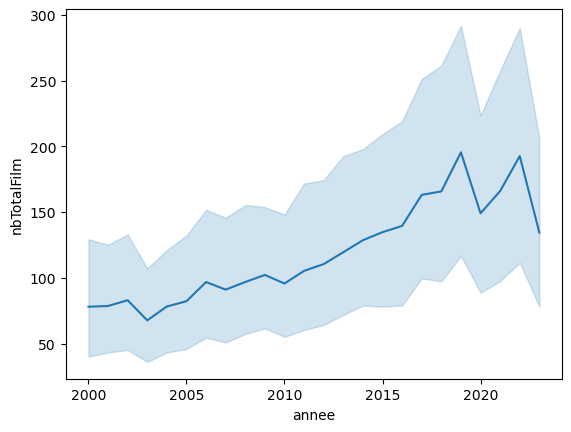

In [145]:
barre = px.bar(nbTotalFilmByGenre, x="genre", y="nbTotalFilm")
sns.lineplot(nbFilmParGenreParAnnee, x="annee", y="nbTotalFilm")

barre.show()
plt.show()

## Exploration des acteurs qui génèrent le plus de revenus

In [146]:
# Filtrer les acteurs dans la table directors and actors fr rating.
actor_and_actress = directors_and_actors_fr_rating.loc[(directors_and_actors_fr_rating["category"] == "actor") | (directors_and_actors_fr_rating["category"] == "actress")]

In [147]:
# Merge avec tmdbFR
actor_and_actress_tmdbFR = actor_and_actress.merge(tmdbFR, how="inner", left_on="tconst", right_on="imdb_id")

In [148]:
actor_and_actress_tmdbFR["revenue"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 99005 entries, 0 to 99004
Series name: revenue
Non-Null Count  Dtype
--------------  -----
99005 non-null  int64
dtypes: int64(1)
memory usage: 773.6 KB


In [149]:
# Pivot table des actrices et acteurs avec les revenus générés
top10actor_and_actress = actor_and_actress_tmdbFR.pivot_table(values="revenue", index="primaryName", aggfunc="sum").sort_values(by="revenue", ascending=False).head(10).reset_index(drop=False)

In [150]:
top10actor_and_actress

,primaryName,revenue
0,Robert Downey Jr.,14166844187
1,Dwayne Johnson,12189984174
2,Chris Evans,11733861230
3,Chris Hemsworth,10157414945
4,Johnny Depp,9510345673
5,Mark Ruffalo,9010047483
6,Samuel L. Jackson,8895327214
7,Tom Cruise,8771019603
8,Emma Watson,8770979569
9,Chris Pratt,8554256406


In [151]:
# Visualisation des acteurs et acrices qui génèrent le plus de revenus depuis 2010
px.bar(
    top10actor_and_actress, 
    x="primaryName", y="revenue", 
    template="seaborn",
    labels={
        "primaryName" : "Acteur/Actrices",
        "revenue" : "Revenus générés"
    },
    title="Revenus générés par les films depuis 2010, par acteurs"
       )

## Exploration du top 5 des acteurs par genre

In [152]:
# Faire merge actors_and_actress avec tmdbFR
actor_and_actress_tmdbFR = actor_and_actress.merge(tmdbFR, how="inner", left_on="tconst", right_on="imdb_id")

In [153]:
# Merge avec la table movieFrance
actors_and_actress_all_merge = actor_and_actress_tmdbFR.merge(movieFrance, how="inner", on="tconst")

In [154]:
# Création des dataframes n'affichant que les 5 acteurs qui ont joué dans les films les plus lucratifs, par genre
top5ByGenre1 = actors_and_actress_all_merge.groupby("Genre1").apply(lambda revenue : revenue.nlargest(5, "revenue"))
top5ByGenre2 = actors_and_actress_all_merge.groupby("Genre2").apply(lambda revenue : revenue.nlargest(5, "revenue"))
top5ByGenre3 = actors_and_actress_all_merge.groupby("Genre3").apply(lambda revenue : revenue.nlargest(5, "revenue"))

In [155]:
# Listes des genres les plus populaires et des genres qui génèrent le plus de revenus
listTop5GenrePop = ["Adventure", "Action", "Sci-Fi", "Biography", "Comedy"]
listTop5GenreRev = ["Adventure", "Action", "Comedy", "Drama", "Sci-Fi"]

In [156]:
# Filtrer les genres des top5 par la liste de popularité
top5ByGenre1Filtered = top5ByGenre1.loc[(top5ByGenre1["Genre1"].isin(listTop5GenrePop))|(top5ByGenre1["Genre1"].isin(listTop5GenreRev))]
top5ByGenre2Filtered = top5ByGenre2.loc[(top5ByGenre2["Genre2"].isin(listTop5GenrePop))|(top5ByGenre2["Genre2"].isin(listTop5GenreRev))]
top5ByGenre3Filtered = top5ByGenre3.loc[(top5ByGenre3["Genre3"].isin(listTop5GenrePop))|(top5ByGenre3["Genre3"].isin(listTop5GenreRev))]

### Visualisations par genre 1, 2 et 3

In [157]:
figRevActG1 = px.bar(top5ByGenre1Filtered, 
                     x="primaryName", 
                     y="revenue", 
                     color="Genre1", 
                     template="seaborn",
                     labels={
                         "primaryName" : "Acteur",
                         "revenue" : "Revenus en milliards de $",
                         "Genre1" : "Genre"
                     },
                     hover_name="Genre1",
                     title="Top 5 des acteurs qui génèrent le plus de revenus par genre 1, pour les films diffusés en France depuis 2010",
                     height=700)

figRevActG2 = px.bar(top5ByGenre2Filtered, 
                     x="primaryName", 
                     y="revenue", 
                     color="Genre2", 
                     template="seaborn",
                     labels={
                         "primaryName" : "Acteur",
                         "revenue" : "Revenus en milliards de $",
                         "Genre2" : "Genre"
                     },
                     hover_name="Genre2",
                     title="Top 5 des acteurs qui génèrent le plus de revenus par genre 2, pour les films diffusés en France depuis 2010",
                     height=700)

figRevActG3 = px.bar(top5ByGenre3Filtered, 
                     x="primaryName", 
                     y="revenue", 
                     color="Genre3", 
                     template="seaborn",
                     labels={
                         "primaryName" : "Acteur",
                         "revenue" : "Revenus en milliards de $",
                         "Genre3" : "Genre"
                     },
                     hover_name="Genre3",
                     title="Top 5 des acteurs qui génèrent le plus de revenus par genre 3, pour les films diffusés en France depuis 2010",
                     height=700)

figRevActG1.show()
figRevActG2.show()
figRevActG3.show()

## Exploration des acteurs le plus à l'affiche

In [158]:
actor_and_actress.merge(movieFrance, how="inner", on="tconst")["primaryName"].value_counts().head(10).reset_index()

,primaryName,count
0,Gérard Depardieu,70
1,Nicolas Cage,67
2,Bruce Willis,63
3,Olivier Gourmet,63
4,Mathieu Amalric,59
5,Isabelle Huppert,56
6,Samuel L. Jackson,55
7,Willem Dafoe,51
8,Jean-Pierre Darroussin,51
9,Karin Viard,51


## Exploration des films qui génèrent le plus de revenus ces dernières années

In [159]:
top10movie = tmdbFR.pivot_table(values="revenue", index="original_title").sort_values(by="revenue", ascending=False).reset_index().head(10)

In [160]:
top10movie

,original_title,revenue
0,Avatar,2.923706e+09
1,Avengers: Endgame,2.794732e+09
2,Avatar: The Way of Water,2.319332e+09
3,Star Wars: The Force Awakens,2.068224e+09
4,Avengers: Infinity War,2.046240e+09
5,Spider-Man: No Way Home,1.921847e+09
6,Jurassic World,1.671537e+09
7,The Lion King,1.663075e+09
8,The Avengers,1.518816e+09
9,Furious 7,1.515341e+09


In [161]:
px.bar(
    top10movie, 
    x="original_title",
    y="revenue",
    labels={
        "original_title" : "Titre du film",
        "revenue" : "Revenus générés par le film"
    },
    title="Top 10 des films diffusés en France qui ont généré le plus de revenus depuis 2010",
    template="seaborn"
    )

### Exploration des directeurs qui génèrent le plus de revenus

In [162]:
# création d'un dataframe avec uniquement les directeurs des films diffusés en France depuis 2000
directorsFr = directors_and_actors_fr.loc[directors_and_actors_fr["category"]=="director"]

In [163]:
# Création d'une table avec le merge entre tmdbfr et directorsFr
directorsTmdbFr = directorsFr.merge(tmdbFR, how="inner", left_on="tconst", right_on="imdb_id")

In [164]:
# Dataframe avec le top 10 des directeurs qui génèrent le plus de revenus depuis 2000
top10directorsRevenue = directorsTmdbFr["revenue"].groupby(directorsTmdbFr["primaryName"]).sum().sort_values(ascending=False).head(11).to_frame().reset_index()

In [165]:
# Visualisation
px.bar(top10directorsRevenue,
       x="primaryName",
       y="revenue",
       labels={
           "primaryName":"Directeur",
           "revenue":"Revenue"
       },
       title="Revenu total généré par réalisateur",
       template="seaborn")

## Exploration films les plus populaires avec leurs directeurs

In [166]:
# Utilisation du dataframe movieFrance pour le trier par ordre décroissant afin de n'afficher que les 10 premiers films
top10popMovie = movieFrance.sort_values(by="numVotes", ascending=False).head(10)

In [167]:
# Utilisation de la table direcotrs précédemment créée pour sortir le nom des directeurs qui ont réalisé les 10 films ayant le plus de vote
directorsTop10PopMovie = directors[directors["tconst"].isin(top10popMovie["tconst"])]

In [168]:
# Merge des deux précédentes tables
top10PopMovieAndDirectors = top10popMovie.merge(directorsTop10PopMovie, how="inner", on="tconst")

In [169]:
# Création d'une table avec les informations que l'on souhaite
top10PopMovieAndDirectors[["title", "primaryName", "numVotes_y", "averageRating_y"]]

,title,primaryName,numVotes_y,averageRating_y
0,The Dark Knight : Le Chevalier noir,Christopher Nolan,2813026,9.0
1,Inception,Christopher Nolan,2497303,8.8
2,Interstellar,Christopher Nolan,2026871,8.7
3,Le Seigneur des anneaux : La Communauté de l'a...,Peter Jackson,1965944,8.8
4,Le Seigneur des anneaux : Le Retour du roi,Peter Jackson,1939056,9.0
5,The Dark Knight Rises,Christopher Nolan,1793822,8.4
6,Le Seigneur des anneaux : Les Deux Tours,Peter Jackson,1748322,8.8
7,Django Unchained,Quentin Tarantino,1657666,8.5
8,Gladiator,Ridley Scott,1584291,8.5
9,Batman Begins,Christopher Nolan,1549799,8.2


<ins>**Interprétations**</ins>:

Nous pouvons constater que 3 films qui ont eu le plus de votes sont des films de Christopher Nolan. Nous pouvons penser qu'il est apprécié des cinéfiles. Pour le vérifier, nous pouvons voir les notes moyennes des films. Les trois sont au dessus de 8.5 ce qui montre que non seulement les films de Christopher Nolan attirent, mais aussi, sont de qualité

In [170]:
tmdbFR.head(3)

,adult,backdrop_path,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,production_companies_name,production_companies_country
10,False,/yzqaKAhglTrkeOfuIXYYArf0WnA.jpg,94000000,"['Animation', 'Family']",http://movies.disney.com/finding-nemo,12,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",...,100,['en'],Released,There are 3.7 trillion fish in the ocean. They...,Finding Nemo,False,7.823,17625,['Pixar'],['US']
14,False,/ikR2qy9xJCHX7M8i5rcvuNfdYXs.jpg,12800000,"['Drama', 'Crime']",NaN,16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",...,141,['en'],Released,You don't need eyes to see.,Dancer in the Dark,False,7.881,1555,"['Lantia Cinema & Audiovisivi', 'Fine Line Fea...","['', '', 'DK', 'DK', 'SE', 'FR', 'SE', 'FR', '..."
15,False,/dhr0q4eiRr8ltqPig32TwhPRdaD.jpg,0,"['Horror', 'Thriller', 'Mystery']",http://www.whatisannwyn.co.uk/,17,tt0411267,en,The Dark,"In an attempt to pull her family together, Adè...",...,87,"['en', 'cy']",Released,One of the living for one of the dead.,The Dark,False,5.815,232,"['Constantin Film', 'Impact Pictures', 'Isle o...","['DE', 'GB', 'GB', 'GB']"


### Nettoyage de tmdbFr pour enlever les colonnes inutiles

In [171]:
# Drop des colonnes non utiles dans tmdbFr
tmdbFRClean = tmdbFR.drop(columns=["adult", "genres", "homepage", "original_title", "overview", "production_countries", "runtime", "tagline", "title", "video", "vote_average", "vote_count"])

In [172]:
tmdbFRClean.to_csv("tmdbFRClean.csv")

## Exploration des compagnies de productions

In [182]:
from ast import literal_eval
tmdbFRClean["production_companies_name"] = tmdbFRClean["production_companies_name"].apply(literal_eval)

In [192]:
movieFrance_V2

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,Genre1,Genre2,Genre3,averageRating,numVotes,ordering,title,region,language,isOriginalTitle,nbFilm
0,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,94,Documentary,Documentary,None,None,6.8,62,2,Histoire de la guerre civile,FR,\N,0,1
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance",Comedy,Fantasy,Romance,6.4,88199,11,Kate et Léopold,FR,\N,0,1
2,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,70,Drama,Drama,None,None,6.4,183,7,El Tango del Viudo y Su Espejo Deformante,FR,\N,0,1
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,122,Drama,Drama,None,None,6.7,7906,15,De l'autre côté du vent,FR,\N,0,1
4,tt0082328,movie,Embodiment of Evil,Encarnação do Demônio,0,2008,94,Horror,Horror,None,None,5.9,1761,6,L'incarnation du démon,FR,\N,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29945,tt9911196,movie,The Marriage Escape,De beentjes van Sint-Hildegard,0,2020,103,"Comedy,Drama",Comedy,Drama,None,7.5,3207,8,De Beentjes van Sint-Hildegard,FR,\N,0,1
29946,tt9913084,movie,Diabolik sono io,Diabolik sono io,0,2019,75,Documentary,Documentary,None,None,6.7,51,2,Diabolik sono io,FR,\N,0,1
29947,tt9913936,movie,Paradise,Paradise,0,2019,135,"Crime,Drama",Crime,Drama,None,7.4,62,6,Le paradis de Diego,FR,\N,0,1
29948,tt9915790,movie,Bobbyr Bondhura,Bobbyr Bondhura,0,2019,106,Family,Family,None,None,7.2,40,3,Bobbyr Bondhura,FR,\N,0,1


In [194]:
tmdbFRClean_V2 = tmdbFRClean.merge(movieFrance_V2[["tconst", "numVotes", "averageRating"]], how="inner", left_on="imdb_id", right_on="tconst")

In [195]:
indicatorsByCompagny = tmdbFRClean_V2.explode("production_companies_name")[["production_companies_name", "release_date", "budget", "revenue", "numVotes", "averageRating"]].groupby(["production_companies_name", "release_date"]).sum().sort_values(by="revenue", ascending=False).reset_index()

In [197]:
indicatorsByCompagny.to_csv("indicateurs_par_compagnie.csv")

In [201]:
indicatorsByCompagny

,production_companies_name,release_date,budget,revenue,numVotes,averageRating
0,Lightstorm Entertainment,2009-12-15,237000000,2923706026,1368165,7.9
1,Dune Entertainment,2009-12-15,237000000,2923706026,1368165,7.9
2,Ingenious Media,2009-12-15,237000000,2923706026,1368165,7.9
3,20th Century Fox,2009-12-15,237000000,2923706026,1368165,7.9
4,Marvel Studios,2019-04-24,356000000,2794731755,1233245,8.4
...,...,...,...,...,...,...
70778,Huoerguosi Bona Culture and Media,2017-08-25,0,0,4280,6.5
70779,Huron Mountain Films,2019-07-31,0,0,3298,6.9
70780,Hurricane Bridge Entertainment,2016-04-08,40000,0,2071,4.7
70781,Hurricane Films,2015-12-04,0,0,4014,6.4


In [208]:
px.bar(indicatorsByCompagny.head(10), x="production_companies_name", y="revenue")

In [210]:
directors_and_actors_fr_rating.merge(tmdbFRClean, how="inner", left_on="tconst", right_on="imdb_id").to_csv("directors_actors_tmdb_merge.csv")